<a href="https://colab.research.google.com/github/srthanakesh/jazz/blob/main/Tutor8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df_salary = pd.read_csv('/content/drive/MyDrive/Dataset/salary_cleaned.csv') #load the csv dataset
df_xtra_info = pd.read_csv('/content/drive/MyDrive/Dataset/xtra_info.csv') #load the csv dataset in

print(len(df_salary))
print(len(df_xtra_info))
df_master = pd.concat([df_salary,df_xtra_info],axis=1)
print(len(df_master))
df_master.head()

Mounted at /content/drive
13404
13404
13404


,USERID,Timestamp,Age,Industry,Job title,Salary,Compensation,Currency,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender,USERID,CGPA,Salary_month_USD,Special Bonus_GBP
0,8683,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,8683,2.990627,4583.333333,2437.0
1,3880,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,3880,2.288131,5166.666667,740.0
2,8898,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,8898,3.903324,5000.000000,3806.0
3,4441,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,112000.0,10000.0,USD,US,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman,4441,2.470852,9333.333333,4691.0
4,7537,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,45000.0,0.0,USD,United States,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman,7537,3.559457,3750.000000,4580.0


In [2]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13404 entries, 0 to 13403
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   USERID                              13404 non-null  int64  
 1   Timestamp                           13403 non-null  object 
 2   Age                                 13403 non-null  object 
 3   Industry                            13403 non-null  object 
 4   Job title                           13403 non-null  object 
 5   Salary                              13403 non-null  float64
 6   Compensation                        13403 non-null  float64
 7   Currency                            13403 non-null  object 
 8   Country                             13403 non-null  object 
 9   State                               13403 non-null  object 
 10  City                                13403 non-null  object 
 11  Overall years of experience         13403

In [3]:
df_master.columns
df_master = df_master.drop(columns='USERID')
df_master.columns

Index(['Timestamp', 'Age', 'Industry', 'Job title', 'Salary', 'Compensation',
       'Currency', 'Country', 'State', 'City', 'Overall years of experience',
       'Years of experience in current job', 'Education level', 'Gender',
       'CGPA', 'Salary_month_USD', 'Special Bonus_GBP'],
      dtype='object')

In [4]:
for feature in df_master.columns:
  len_feature = df_master[feature].nunique()
  print(f'{feature}: {len_feature}')

Timestamp: 12364
Age: 7
Industry: 717
Job title: 7670
Salary: 1791
Compensation: 451
Currency: 5
Country: 89
State: 106
City: 2664
Overall years of experience: 8
Years of experience in current job: 8
Education level: 6
Gender: 5
CGPA: 13403
Salary_month_USD: 1791
Special Bonus_GBP: 4673


In [5]:
feature_small = []
feature_large = []
for feature in df_master.columns:
  x = df_master[feature].nunique()
  print(f'{feature}: {x}')
  #len_feature = df_master[feature].nunique()

Timestamp: 12364
Age: 7
Industry: 717
Job title: 7670
Salary: 1791
Compensation: 451
Currency: 5
Country: 89
State: 106
City: 2664
Overall years of experience: 8
Years of experience in current job: 8
Education level: 6
Gender: 5
CGPA: 13403
Salary_month_USD: 1791
Special Bonus_GBP: 4673


In [6]:
feature_small = []
feature_large = []
for feature in df_master.columns:
  len_feature = df_master[feature].nunique()
  if (len_feature<=10):
    feature_small.append([feature, len_feature])
  else:
    feature_large.append([feature, len_feature])
print('----Feature small----')
for item in feature_small:
  #print(f'{item}: {item[0]}')
  print(item)
print('\n-----Feature large------')
for item in feature_large:
  print(item)

----Feature small----
['Age', 7]
['Currency', 5]
['Overall years of experience', 8]
['Years of experience in current job', 8]
['Education level', 6]
['Gender', 5]

-----Feature large------
['Timestamp', 12364]
['Industry', 717]
['Job title', 7670]
['Salary', 1791]
['Compensation', 451]
['Country', 89]
['State', 106]
['City', 2664]
['CGPA', 13403]
['Salary_month_USD', 1791]
['Special Bonus_GBP', 4673]


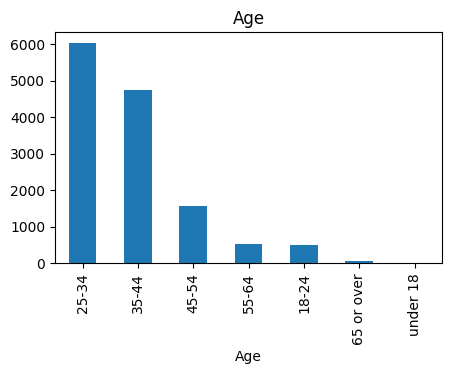

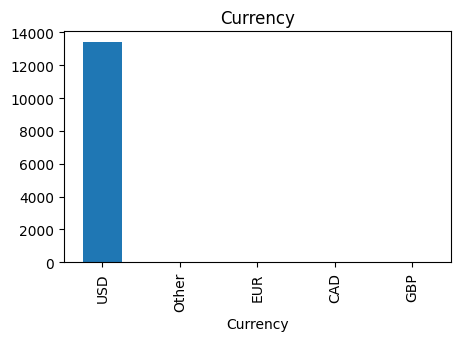

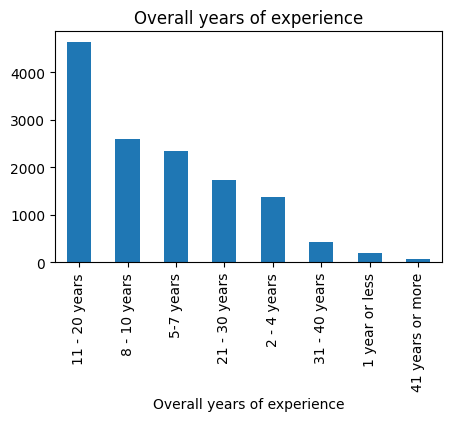

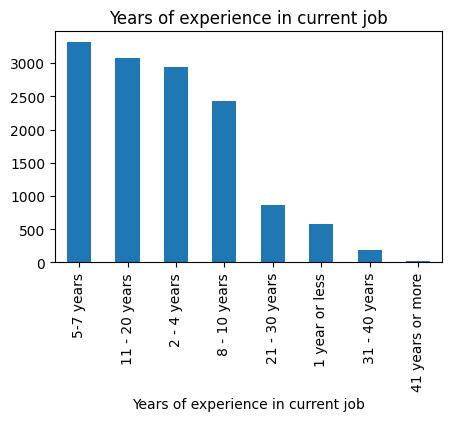

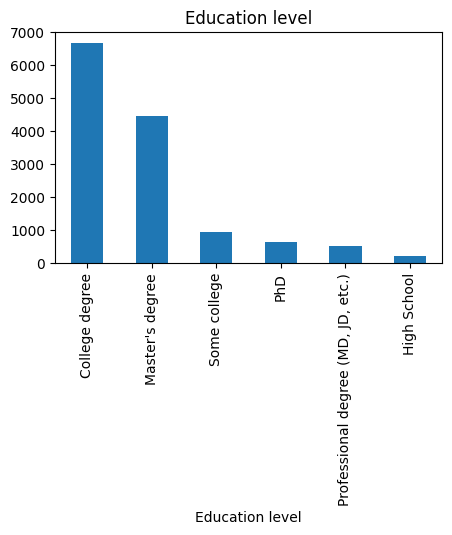

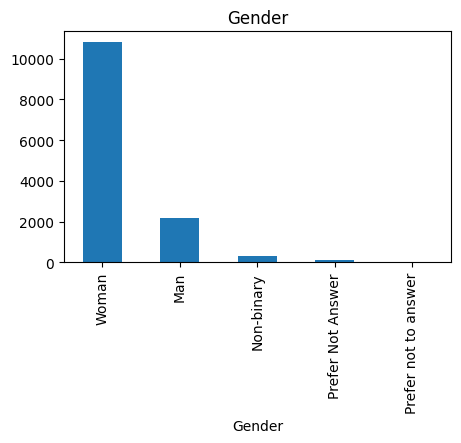

In [7]:
import matplotlib.pyplot as plt
for item in feature_small:
  column_name = item[0]
  #print(column_name)
  df_master[column_name].value_counts().plot(kind='bar',figsize=(5,3),title=column_name)
  plt.show()

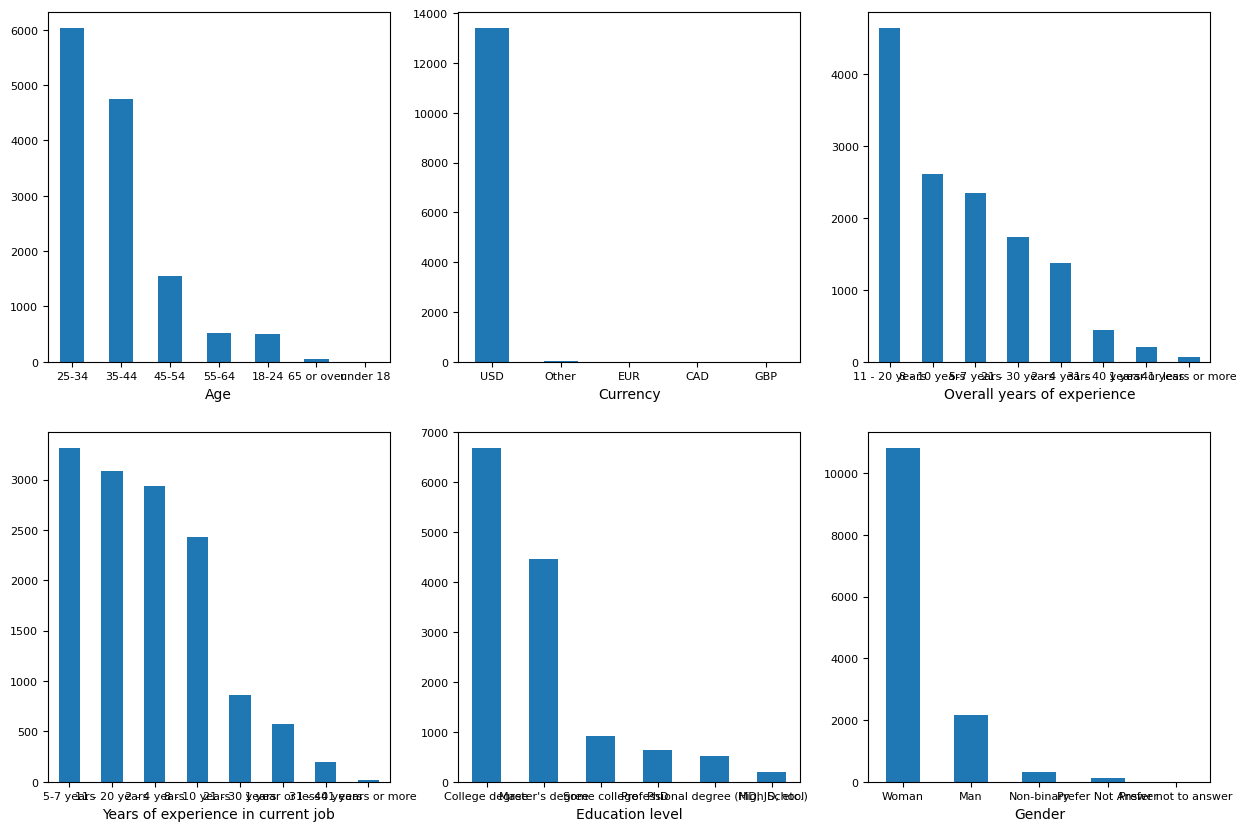

In [10]:
fig, axes = plt.subplots(2, 3)
import matplotlib.pyplot as plt
i=0
j=0
for item in feature_small:
  column_name = item[0]
  #df_master[column_name].value_counts().plot(kind='bar',figsize=(16,12),title=column_name,ax=axes[
  df_master[column_name].value_counts().plot(kind='bar',figsize=(15,10),ax=axes[i,j],fontsize=8,rot=0)
  #axes[i,j].title.set_size(10)
  if(j<2):
    j+=1
  else:
      j=0
      i+=1

In [11]:
# Slicing, subset, filtering the data
# Method 1
x = df_master[df_master['Gender']=="Man"]
y = x[x['Education level']=='College degree']
y

,Timestamp,Age,Industry,Job title,Salary,Compensation,Currency,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender,CGPA,Salary_month_USD,Special Bonus_GBP
6,4/27/2021 11:03:09,35-44,"Accounting, Banking & Finance",Manager of Information Services,100000.0,0.0,USD,United States,Michigan,Detroit,11 - 20 years,11 - 20 years,College degree,Man,3.261070,8333.333333,4790.0
19,4/27/2021 11:04:02,25-34,Government and Public Administration,Manager of Data Integrity and Prospect Research,65000.0,0.0,USD,USA,Virginia,Richmond,5-7 years,5-7 years,College degree,Man,2.750741,5416.666667,4059.0
28,4/27/2021 11:04:29,65 or over,Property or Construction,Safety Director,104000.0,25000.0,USD,USA,Georgia,Atlanta,41 years or more,21 - 30 years,College degree,Man,3.063841,8666.666667,186.0
43,4/27/2021 11:05:08,45-54,Computing or Tech,senior web application developer,98166.0,0.0,USD,United States,Indiana,Indianapolis,21 - 30 years,21 - 30 years,College degree,Man,2.305738,8180.500000,2595.0
77,4/27/2021 11:06:07,25-34,Engineering or Manufacturing,Production Technician,65000.0,4000.0,USD,United States,Wisconsin,Madison,5-7 years,2 - 4 years,College degree,Man,3.079249,5416.666667,316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13394,5/9/2023 17:57,45-54,Computing or Tech,Junior Data Analyst,65000.0,0.0,USD,USA,Virginia,Richmond,21 - 30 years,1 year or less,College degree,Man,3.850488,5416.666667,4945.0
13395,5/28/2023 16:10:53,45-54,Computing or Tech,Data Analyst,65000.0,0.0,USD,United States,New York,Bronx,21 - 30 years,8 - 10 years,College degree,Man,2.597469,5416.666667,135.0
13399,9/25/2023 9:20:50,18-24,"Accounting, Banking & Finance",Program Analyst,70000.0,5000.0,USD,United States,Missouri,St.Louis,1 year or less,1 year or less,College degree,Man,3.852219,5833.333333,2399.0
13400,10/5/2023 12:26,45-54,"Marketing, Advertising & PR",Account Supervisor,100000.0,0.0,USD,USA,Texas,Austin,31 - 40 years,31 - 40 years,College degree,Man,2.679718,8333.333333,3552.0


In [12]:
# Slicing, subset, filtering the data
# Method 2
#df_master.query('Gender == "Man"')
df_master.query('Gender == "Man" and State == "Michigan"')

,Timestamp,Age,Industry,Job title,Salary,Compensation,Currency,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender,CGPA,Salary_month_USD,Special Bonus_GBP
6,4/27/2021 11:03:09,35-44,"Accounting, Banking & Finance",Manager of Information Services,100000.0,0.0,USD,United States,Michigan,Detroit,11 - 20 years,11 - 20 years,College degree,Man,3.261070,8333.333333,4790.0
51,4/27/2021 11:05:23,45-54,Education (Higher Education),Professor,95000.0,10000.0,USD,USA,Michigan,Detroit,21 - 30 years,11 - 20 years,PhD,Man,2.258662,7916.666667,861.0
370,4/27/2021 11:14:31,25-34,Engineering or Manufacturing,Product development engineer,90000.0,5000.0,USD,USA,Michigan,Dearborn,8 - 10 years,5-7 years,College degree,Man,2.216275,7500.000000,3599.0
400,4/27/2021 11:15:23,35-44,Sales,Inside Sales Representative,55000.0,12000.0,USD,USA,Michigan,Auburn Hills,5-7 years,5-7 years,College degree,Man,3.111487,4583.333333,1874.0
739,4/27/2021 11:25:56,35-44,Education (Primary/Secondary),Teacher,54389.0,0.0,USD,United States,Michigan,Portage,11 - 20 years,11 - 20 years,Master's degree,Man,3.705842,4532.416667,2887.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13126,10/26/2021 15:31:32,25-34,Engineering or Manufacturing,Maintenance Team Leader,71240.0,12000.0,USD,USA,Michigan,Sterling Heights,11 - 20 years,11 - 20 years,College degree,Man,3.926296,5936.666667,4012.0
13172,10/27/2021 7:35:42,25-34,Transport or Logistics,Trade Advisory Consultant,70000.0,1000.0,USD,United States,Michigan,Detroit,5-7 years,2 - 4 years,College degree,Man,2.916323,5833.333333,3418.0
13275,2/13/2022 15:22:24,25-34,Engineering or Manufacturing,Test Automation Engineer,125000.0,15000.0,USD,United States,Michigan,Detroit,5-7 years,5-7 years,Master's degree,Man,3.041803,10416.666670,3638.0
13276,2/13/2022 15:24:49,25-34,Engineering or Manufacturing,Test Automation Engineer,125000.0,15000.0,USD,United States,Michigan,Detroit,5-7 years,5-7 years,Master's degree,Man,2.630510,10416.666670,4672.0


<Axes: >

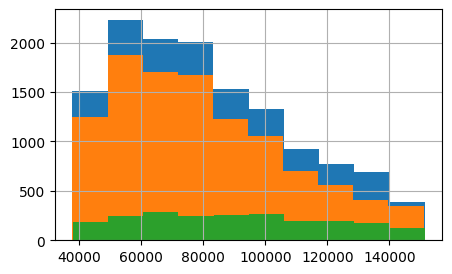

In [13]:
# In one line, the data is sliced/filter by gender, then the 'compensation' column
# column of woman is plotted
#df_master[df_master['Gender']=='Woman']['Compensation'].hist()
#df_master[df_master['Gender']=='Man']['Salary'].hist(figsize=(5,3))
df_master['Salary'].hist(figsize=(5,3))
df_master[df_master['Gender']=='Woman']['Salary'].hist(figsize=(5,3)) #'Slicing' or
df_master[df_master['Gender']=='Man']['Salary'].hist(figsize=(5,3))

<Axes: >

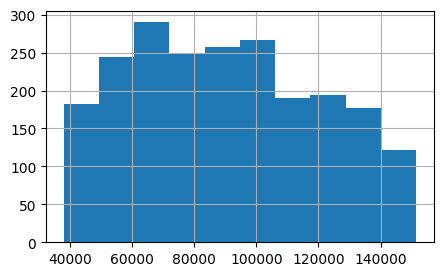

In [14]:
df_master[df_master['Gender']=='Man']['Salary'].hist(figsize=(5,3))
#df_master['Salary'].plot.box(figsize=(5,3))
#df_master[df_master['Gender']=='Woman']['Salary'].plot.box(figsize=(5,3))
#plt.show()
#df_master[df_master['Gender']=='Man']['Salary'].plot.box(figsize=(5,3))

In [15]:
df_woman = df_master[df_master['Gender']=='Woman']
numerical_cols = df_master.select_dtypes(include=np.number).columns.tolist()
df_woman[numerical_cols].corr()

,Salary,Compensation,CGPA,Salary_month_USD,Special Bonus_GBP
Salary,1.000000,0.413883,0.011891,1.000000,0.000940
Compensation,0.413883,1.000000,-0.005318,0.413883,-0.000094
CGPA,0.011891,-0.005318,1.000000,0.011891,0.006638
Salary_month_USD,1.000000,0.413883,0.011891,1.000000,0.000940
Special Bonus_GBP,0.000940,-0.000094,0.006638,0.000940,1.000000


In [16]:
df_man = df_master[df_master['Gender']=='Man']
df_man[numerical_cols].corr()

,Salary,Compensation,CGPA,Salary_month_USD,Special Bonus_GBP
Salary,1.000000,0.353905,-0.001814,1.000000,0.003739
Compensation,0.353905,1.000000,-0.043991,0.353905,-0.012346
CGPA,-0.001814,-0.043991,1.000000,-0.001814,0.006694
Salary_month_USD,1.000000,0.353905,-0.001814,1.000000,0.003739
Special Bonus_GBP,0.003739,-0.012346,0.006694,0.003739,1.000000


In [17]:
df_woman[df_woman['Education level']=="College degree"]
mean_x = df_woman[df_woman['Education level']=="College degree"]['Salary'].mean()
mean_y = df_man[df_man['Education level']=="College degree"]['Salary'].mean()
print('mean salary of woman who has college degree',mean_x)
print('mean salary of man who has college degree',mean_y)

mean salary of woman who has college degree 77155.12859304085
mean salary of man who has college degree 88774.55326460481


In [18]:
df_woman[df_woman['Education level']=="College degree"]
#level = 'College degree'
level = "Master's degree"
mean_woman = df_woman[df_woman['Education level']==level]['Salary'].mean()
mean_man = df_man[df_man['Education level']==level]['Salary'].mean()
print(f'mean salary of woman who has {level} degree: {mean_woman}')
print(f'mean salary of man who has {level} degree: {mean_man}')

mean salary of woman who has Master's degree degree: 82590.60483014862
mean salary of man who has Master's degree degree: 94308.19389587073


In [19]:
df_woman['Education level'].unique()

array(["Master's degree", 'College degree', 'PhD', 'Some college',
       'High School', 'Professional degree (MD, JD, etc.)'], dtype=object)

<Axes: xlabel='Education_level'>

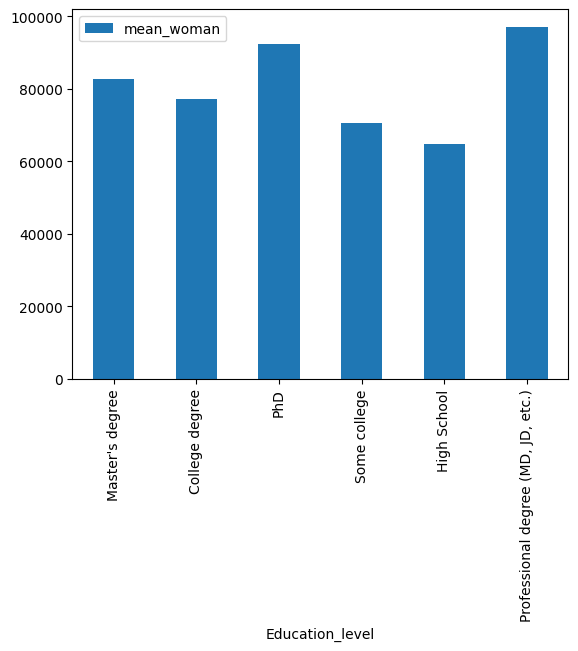

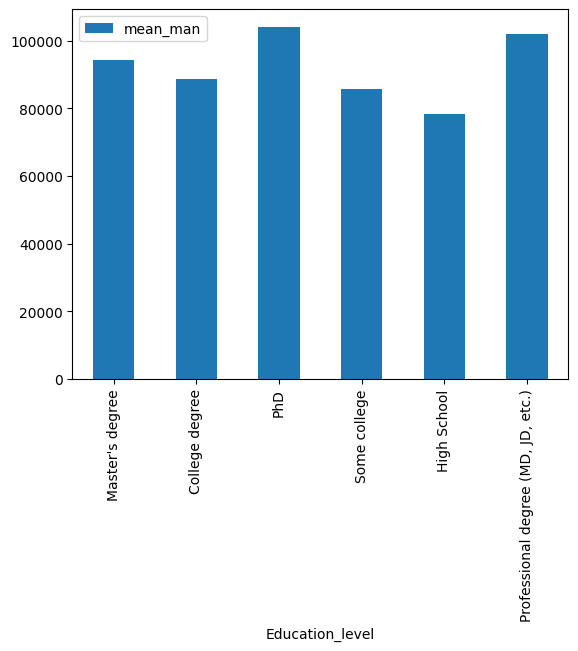

In [22]:
edu_level_lists = df_woman['Education level'].unique()
salary_by_edu = []
for level in edu_level_lists:
  mean_x = df_woman[df_woman['Education level']==level]['Salary'].mean()
  mean_y = df_man[df_man['Education level']==level]['Salary'].mean()
  salary_by_edu.append([level,mean_x,mean_y])
salary_by_edu = pd.DataFrame(salary_by_edu,columns=['Education_level','mean_woman','mean_man'])
salary_by_edu.head()
salary_by_edu.plot.bar(x='Education_level',y='mean_woman')
salary_by_edu.plot.bar(x='Education_level',y='mean_man')